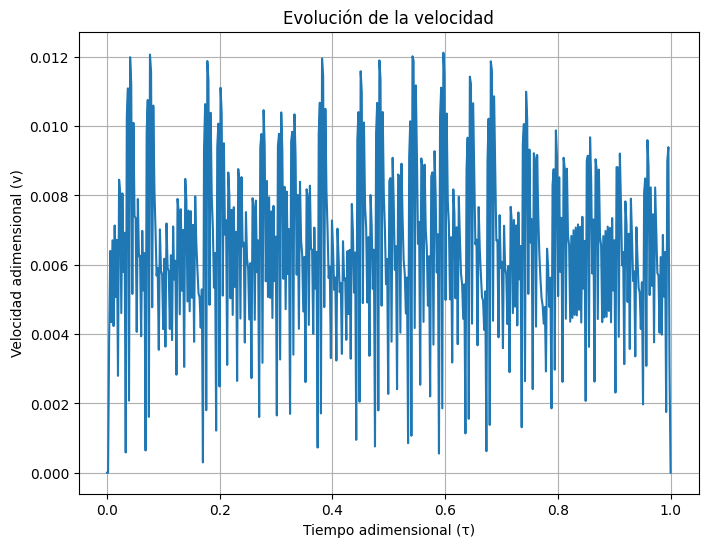

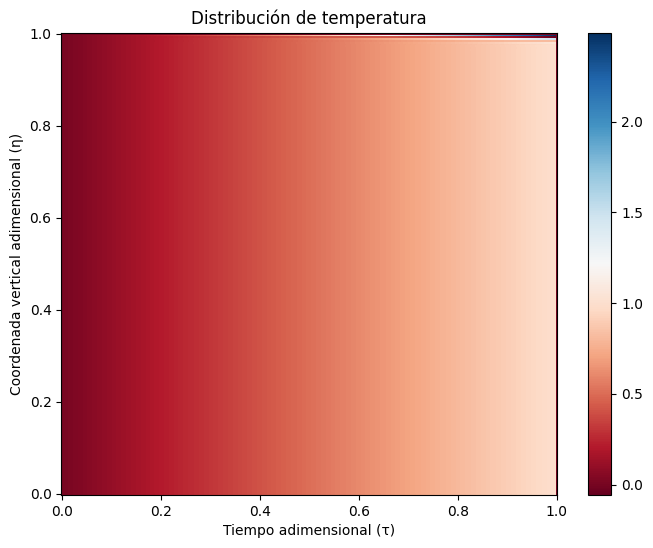

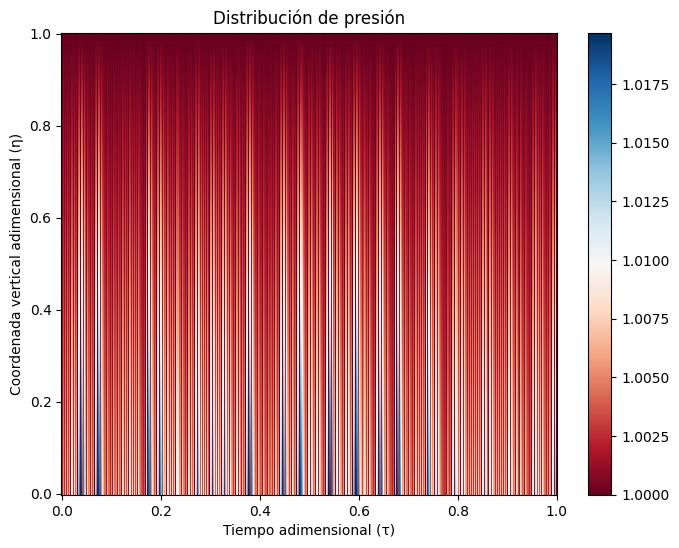

In [28]:
import numpy as np
import matplotlib.pyplot as plt

Pi_0 = 0.009671848013816927
Pi_d = 0.0037461972810798536
delta = 1.129195275611716e-08
gamma = 0.06656134363640165
LAMBDA = 0.05
theta_r = 15.529281548829731
phi = 0.036608739000020846

# Definición de variables y condiciones iniciales
M = 256 # Número de puntos en la dirección vertical
N = 512 # Número de puntos en la dirección temporal
eta = np.linspace(0, 1, M)  # Coordenada vertical adimensional
tau = np.linspace(0, 1, N)  # Coordenada temporal adimensional
deta = (eta[-1] - eta[0])/M
dtau = (tau[-1] - tau[0])/N 
v = np.zeros(N)  # Velocidad adimensional
theta = np.zeros((M, N))  # Temperatura adimensional
Pi = np.ones((M, N))  # Presión adimensional, inicialmente todo el espacio se encuentra a p_atm

presiones = np.zeros((M,N))

# Condiciones iniciales
v[0] = 0.0  # Velocidad inicial cero
theta[:, 0] = 0.0  # Temperatura inicial uniforme

# Simulación numérica
for t in range(1, N-1):

    # Calculo de la velocidad en el instante i+1 a partir de la presión en eta = 0 del instante anterior:
    v[t] = np.sqrt(2 * (Pi[0, t-1] - 1) * Pi_d)

    # Calculo de las distribuciones de temperatura y presion en el espacio para el instante i+1:
    for x in range(M-1):
         
        dtheta_deta = (theta[x+1, t-1] - theta[x, t-1]) / deta
        d2theta_deta2 = (theta[x+1, t-1] - 2 * theta[x, t-1] + theta[x-1, t-1]) / deta**2
        theta[x, t] = theta[x, t-1] + dtau * (- v[t] * dtheta_deta
                                            + delta * d2theta_deta2
                                            - gamma * (theta[x, t-1] - theta_r))
        
        dv_dt = (v[t] - v[t-1]) / dtau
        #Pi[x, t] = Pi[x, t-1] - deta * Pi_d * (dv_dt + phi * (theta[x, t] - theta_r) + LAMBDA * v[t]**2)  
        # sale algo muy bonito y guay pero esta mal
        # Deberia de ser:
        # Calcular la variación de la velocidad
        
        # Calcular Pi[x,t] en función de Pi[x+1,t]
        
        if x != 0:  # Evitar modificar Pi[-1,t]
                Pi[M-1-x, t] = Pi[M-x, t] + abs(deta * Pi_d * (dv_dt + phi * (theta[M-1-x, t] - theta_r) + LAMBDA * v[t]**2))
           

        else:
            # Mantener Pi[-1,t] sin modificar
            Pi[M-1-x, t] = 1
            #print(Pi[M-1-x,t])

        Pi[0, t] = Pi[1, t] + deta * Pi_d * (dv_dt + phi * (theta[0, t] - theta_r) + LAMBDA * v[t]**2)
# Gráfico lineal de v
plt.figure(figsize=(8, 6))
plt.plot(tau, v)
plt.xlabel('Tiempo adimensional (τ)')
plt.ylabel('Velocidad adimensional (v)')
plt.title('Evolución de la velocidad')
plt.grid()
plt.show()

# Mapa de calor de θ
plt.figure(figsize=(8, 6))
plt.pcolormesh(tau, eta, theta, cmap='RdBu')
plt.colorbar()
plt.xlabel('Tiempo adimensional (τ)')
plt.ylabel('Coordenada vertical adimensional (η)')
plt.title('Distribución de temperatura')
plt.show()

# Mapa de calor de Π
plt.figure(figsize=(8, 6))
plt.pcolormesh(tau, eta, Pi, cmap='RdBu')
plt.colorbar()
plt.xlabel('Tiempo adimensional (τ)')
plt.ylabel('Coordenada vertical adimensional (η)')
plt.title('Distribución de presión')
plt.show()


In [22]:
print(Pi[:, 2])

[0.99450438 0.99452593 0.99454748 0.99456904 0.99459059 0.99461214
 0.99463369 0.99465525 0.9946768  0.99469835 0.9947199  0.99474146
 0.99476301 0.99478456 0.99480611 0.99482767 0.99484922 0.99487077
 0.99489232 0.99491388 0.99493543 0.99495698 0.99497853 0.99500009
 0.99502164 0.99504319 0.99506474 0.9950863  0.99510785 0.9951294
 0.99515095 0.99517251 0.99519406 0.99521561 0.99523716 0.99525872
 0.99528027 0.99530182 0.99532337 0.99534493 0.99536648 0.99538803
 0.99540958 0.99543114 0.99545269 0.99547424 0.99549579 0.99551735
 0.9955389  0.99556045 0.99558201 0.99560356 0.99562511 0.99564666
 0.99566822 0.99568977 0.99571132 0.99573287 0.99575443 0.99577598
 0.99579753 0.99581908 0.99584064 0.99586219 0.99588374 0.99590529
 0.99592685 0.9959484  0.99596995 0.9959915  0.99601306 0.99603461
 0.99605616 0.99607771 0.99609927 0.99612082 0.99614237 0.99616392
 0.99618548 0.99620703 0.99622858 0.99625013 0.99627169 0.99629324
 0.99631479 0.99633634 0.9963579  0.99637945 0.996401   0.99642

In [20]:
print(theta[:,1])

[0.00201885 0.00201885 0.00201885 0.00201885 0.00201885 0.00201885
 0.00201885 0.00201885 0.00201885 0.00201885 0.00201885 0.00201885
 0.00201885 0.00201885 0.00201885 0.00201885 0.00201885 0.00201885
 0.00201885 0.00201885 0.00201885 0.00201885 0.00201885 0.00201885
 0.00201885 0.00201885 0.00201885 0.00201885 0.00201885 0.00201885
 0.00201885 0.00201885 0.00201885 0.00201885 0.00201885 0.00201885
 0.00201885 0.00201885 0.00201885 0.00201885 0.00201885 0.00201885
 0.00201885 0.00201885 0.00201885 0.00201885 0.00201885 0.00201885
 0.00201885 0.00201885 0.00201885 0.00201885 0.00201885 0.00201885
 0.00201885 0.00201885 0.00201885 0.00201885 0.00201885 0.00201885
 0.00201885 0.00201885 0.00201885 0.00201885 0.00201885 0.00201885
 0.00201885 0.00201885 0.00201885 0.00201885 0.00201885 0.00201885
 0.00201885 0.00201885 0.00201885 0.00201885 0.00201885 0.00201885
 0.00201885 0.00201885 0.00201885 0.00201885 0.00201885 0.00201885
 0.00201885 0.00201885 0.00201885 0.00201885 0.00201885 0.0020